# Mobile Application Success Predication


## Data Selection and Exploratory Data Analysis

For the purposes of this research project, we will be working with a dataset of Google Play store app download details obtained from [Kaggle](https://www.kaggle.com/datasets/yash16jr/google-play-store-cleaned?resource=download). Cellphones have become an essential part of daily life worldwide. In fact, based upon [surveys](https://www.pewresearch.org/internet/fact-sheet/mobile/) conducted by the Pew Research Group, Americans are overwhelmingly connected to their mobile devices with 97 percent indicating cellphone ownership and 85 percent advising that they own a smartphone. For a tech-forward thinking person or company, a good way to carve out a successful business endeavour &mdash; engaging with as wide an audience as possible &mdash; is by developing a mobile application. Whether this mobile application is a way to leverage revenue by support of advertising partners (banners in otherwise free apps like What the Forecast), through in app microtransactions (in game currency a la Pokemon Go), or by simply offering another interface for existing direct to consumer sales (Amazon, Target, My Disney Experience), a wide variety of factors can impact the success of mobile applications, such as cost to use, genre, age rating, prior user adoption, and so on. This project hopes to explore these elements, establishing relationships to better understand the question of what, in theory, has the makings of a good app. We hope to develop a model that can be used to predict user rating as a measure of app success. For the purposes of this treatment, we are making the decision to define a successful app as one with a rating greater than or equal to $4$ and anything not successful as one with a rating less than $4$. While we understand that trends come and go, we hope that the general concepts being explored can be adjusted as user interest ebbs and flows.

In [1]:
# Importing packages likely necessary for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split # To create training and test datasets for model testing
from sklearn.metrics import plot_confusion_matrix # To analyze success of model
import seaborn as sns # For quick visualization of heatmap

In [2]:
# Check versions of packages
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('scikit-learn version:', sklearn.__version__)
print('seaborn version:', sns.__version__)

pandas version: 1.4.4
numpy version: 1.21.5
scikit-learn version: 1.0.2
seaborn version: 0.11.2


In [3]:
# Loading dataset
play_store_df = pd.read_csv('Google_data_cleaned.csv')
# Display first 5 lines of dataset
play_store_df.head()

,Unnamed: 0,app,category,rating,reviews,installs,type,price,content_rating,genres,current_ver,android_ver,size(kb),update_month,update_year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,0,0.0,Everyone,Art & Design,1.0.0,4.0.3,19000.0,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3,14000.0,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,0,0.0,Everyone,Art & Design,1.2.4,4.0.3,8.7,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,0,0.0,Teen,Art & Design,NaN,4.2,25000.0,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,0,0.0,Everyone,Art & Design;Creativity,1.1,4.4,2.8,6,2018


In [4]:
# Provide dimension summary for dataset
play_store_df.shape

(9658, 15)

In [5]:
# Display data types for columns in dataframe
play_store_df.dtypes

Unnamed: 0          int64
app                object
category           object
rating            float64
reviews             int64
installs            int64
type                int64
price             float64
content_rating     object
genres             object
current_ver        object
android_ver        object
size(kb)          float64
update_month        int64
update_year         int64
dtype: object

In [6]:
# Get summary statistics of numerical data columns
play_store_df.describe()

,Unnamed: 0,rating,reviews,installs,type,price,size(kb),update_month,update_year
count,9658.000000,8196.000000,9.658000e+03,9.658000e+03,9658.000000,9658.000000,8432.000000,9658.000000,9658.00000
mean,5273.607890,4.173243,2.166150e+05,7.778312e+06,0.078277,1.099413,18372.195837,6.364051,2017.34562
std,2991.145456,0.536625,1.831413e+06,5.376100e+07,0.268621,16.853021,23292.236057,2.659746,1.13764
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.000000,2010.00000
25%,2716.250000,4.000000,2.500000e+01,1.000000e+03,0.000000,0.000000,5.300000,5.000000,2017.00000
50%,5356.500000,4.300000,9.670000e+02,1.000000e+05,0.000000,0.000000,12000.000000,7.000000,2018.00000
75%,7855.750000,4.500000,2.940800e+04,1.000000e+06,0.000000,0.000000,28000.000000,8.000000,2018.00000
max,10357.000000,5.000000,7.815831e+07,1.000000e+09,1.000000,400.000000,100000.000000,12.000000,2018.00000


In [7]:
# Display summary statistics of the non-numerical data types
play_store_df.describe(include = ['O'])

,app,category,content_rating,genres,current_ver,android_ver
count,9658,9658,9658,9658,8596,8667
unique,9658,33,6,118,2816,25
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,Everyone,Tools,1.0,4.1
freq,1,1831,7903,826,799,2203


### Observations

- The dataset is composed of $9658$ rows and $15$ columns
- There are both numerical and categoral data types
- There is also missing data in some of these columns, and while the number is not very high, we will need to address this
- At a glance it is apparent that there are columns such as `Unnamed: 0` and `app` which can immediately be eliminated from our model, other columns may also need to be discarded (`current_ver`, `update_month`, and `update_year`).
- While the type column's dtype is listed as `int64` this column is actually categorical as the number refers to whether the app is free ($0$) or paid ($1$)
- There are a significant number of unique genres but not very many categories. It may be worthwhile verifying what these unique values are.
- Our target goal will require the transformation of the `rating` column to a binary feature with ratings greater than or equal to $4$ being classed as a successful and those with a rating less than $4$ being deemed not successful. 

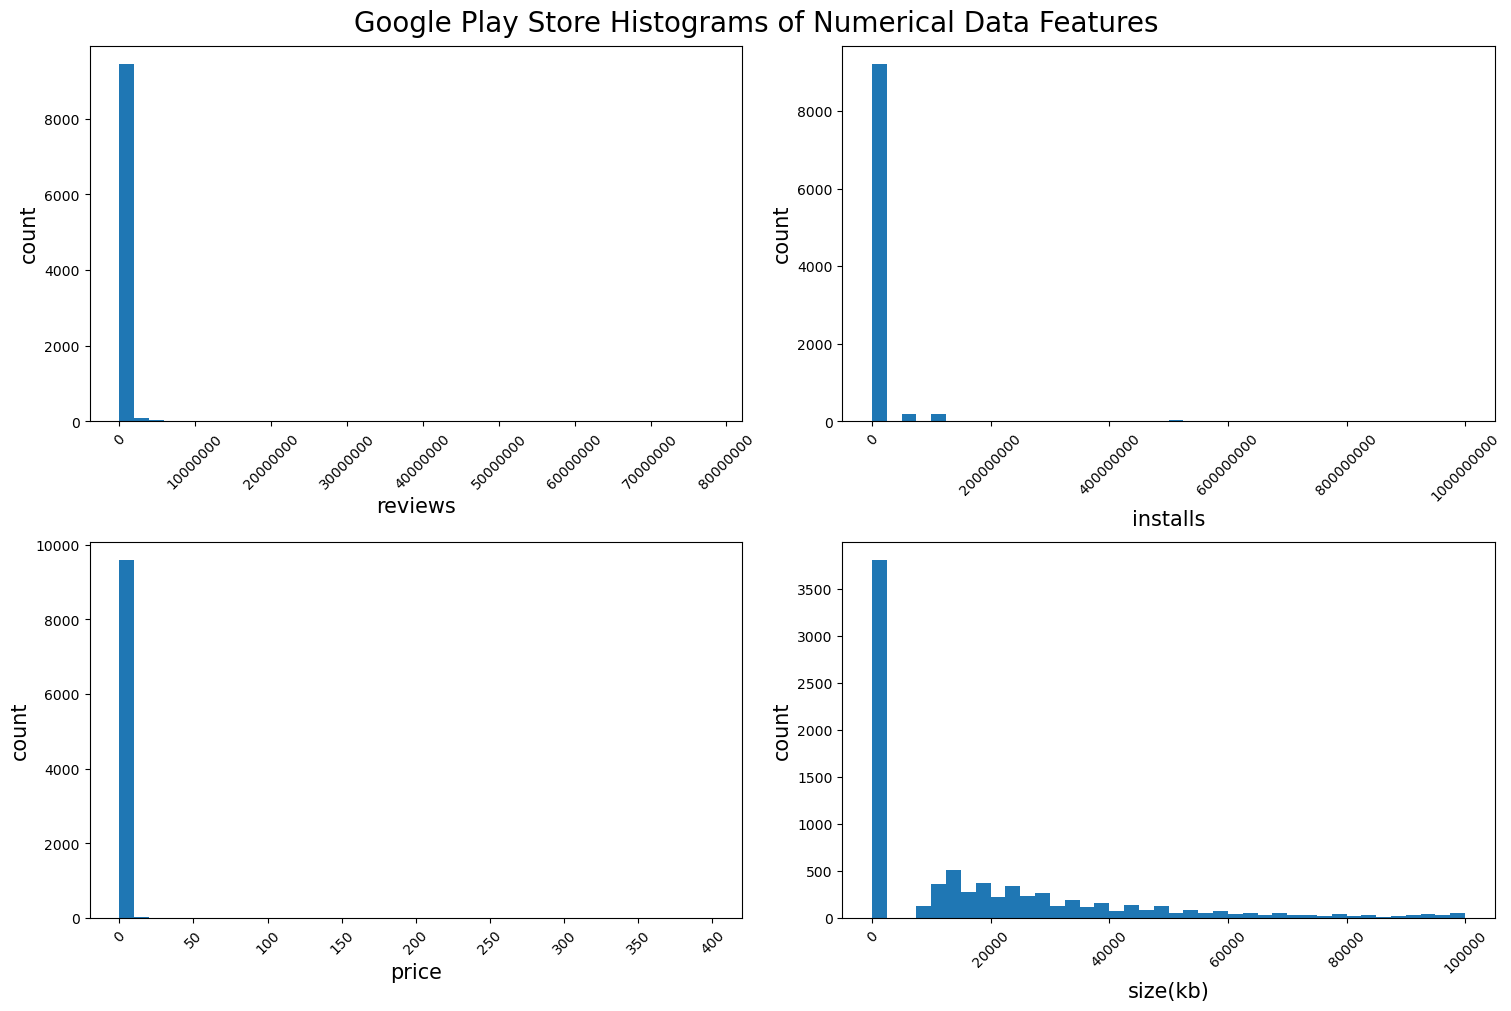

In [8]:
# Create histograms for the features with numerical data
# Set figure size
plt.rcParams['figure.figsize'] = (15, 10)

# Create subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2, constrained_layout = True)
fig.suptitle('Google Play Store Histograms of Numerical Data Features', fontsize=20)
# Specify the features of interest
num_features = ['reviews', 'installs', 'price', 'size(kb)']
xaxes = num_features
yaxes = ['count', 'count', 'count', 'count']
# Create histograms
axes = axes.ravel()
for ids, ax in enumerate(axes):
    ax.hist(play_store_df[num_features[ids]].dropna(), bins=40)
    ax.set_xlabel(xaxes[ids], fontsize=15)
    ax.set_ylabel(yaxes[ids], fontsize=15)
    ax.tick_params(axis='x', labelrotation = 45)
    ax.ticklabel_format(style='plain', axis='x')
plt.show()

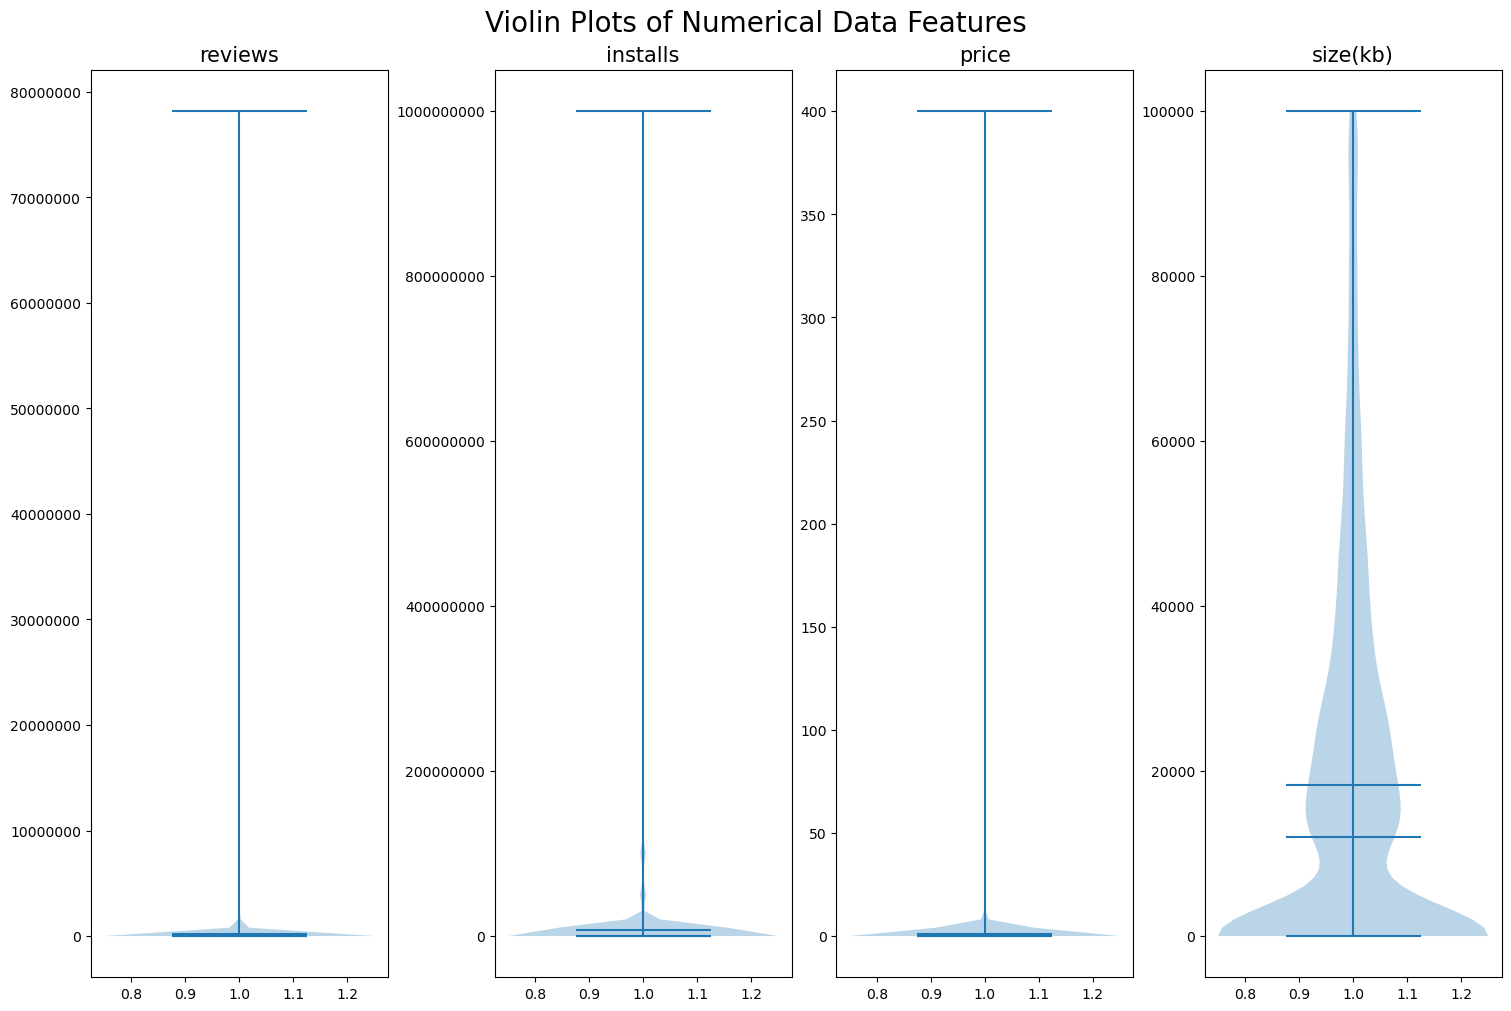

In [9]:
# Create alternative visualization of these 
# Set figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)
# Create subplots
fig, axes = plt.subplots(nrows = 1, ncols = 4, constrained_layout = True)
fig.suptitle('Violin Plots of Numerical Data Features', fontsize=20)
# Specify the features of interest
num_features = ['reviews', 'installs', 'price', 'size(kb)']
xaxes = num_features
# Create violin plots
axes = axes.ravel()
for ids, ax in enumerate(axes):
    ax.violinplot(play_store_df[num_features[ids]].dropna(), showmedians=True, showmeans=True)
    ax.set_title(xaxes[ids], fontsize=15)
    ax.ticklabel_format(style='plain', axis='y')
plt.show()

### Observations

- The summary statistics show that there is a fairly wide range of values for our numerical data columns
- Challenges in finding an ideal bin size for the histograms and shape of the violin plots reconfirm the data is skewed
- It will be important to address how we will take this into consideration

In [10]:
# Create a copy of the dataframe for graphing categorical variables
# Keeps original data intact for data preparation milestone steps
play_df_plots = play_store_df.copy()
play_df_plots.loc[play_df_plots['rating'] < 4, 'rating'] = 0 # Ratings less than 4 are changed to 0
play_df_plots.loc[play_df_plots['rating'] >= 4, 'rating'] = 1 # Ratings greater or equal to 4 changed to 1
play_df_plots = play_df_plots.replace \
({'rating': {1: 'Successful', 0: 'Not Successful'}}) # Replaces numerical with categorical equivalent
play_df_plots = play_df_plots.replace \
({'type': {1: 'Paid', 0: 'Free'}})

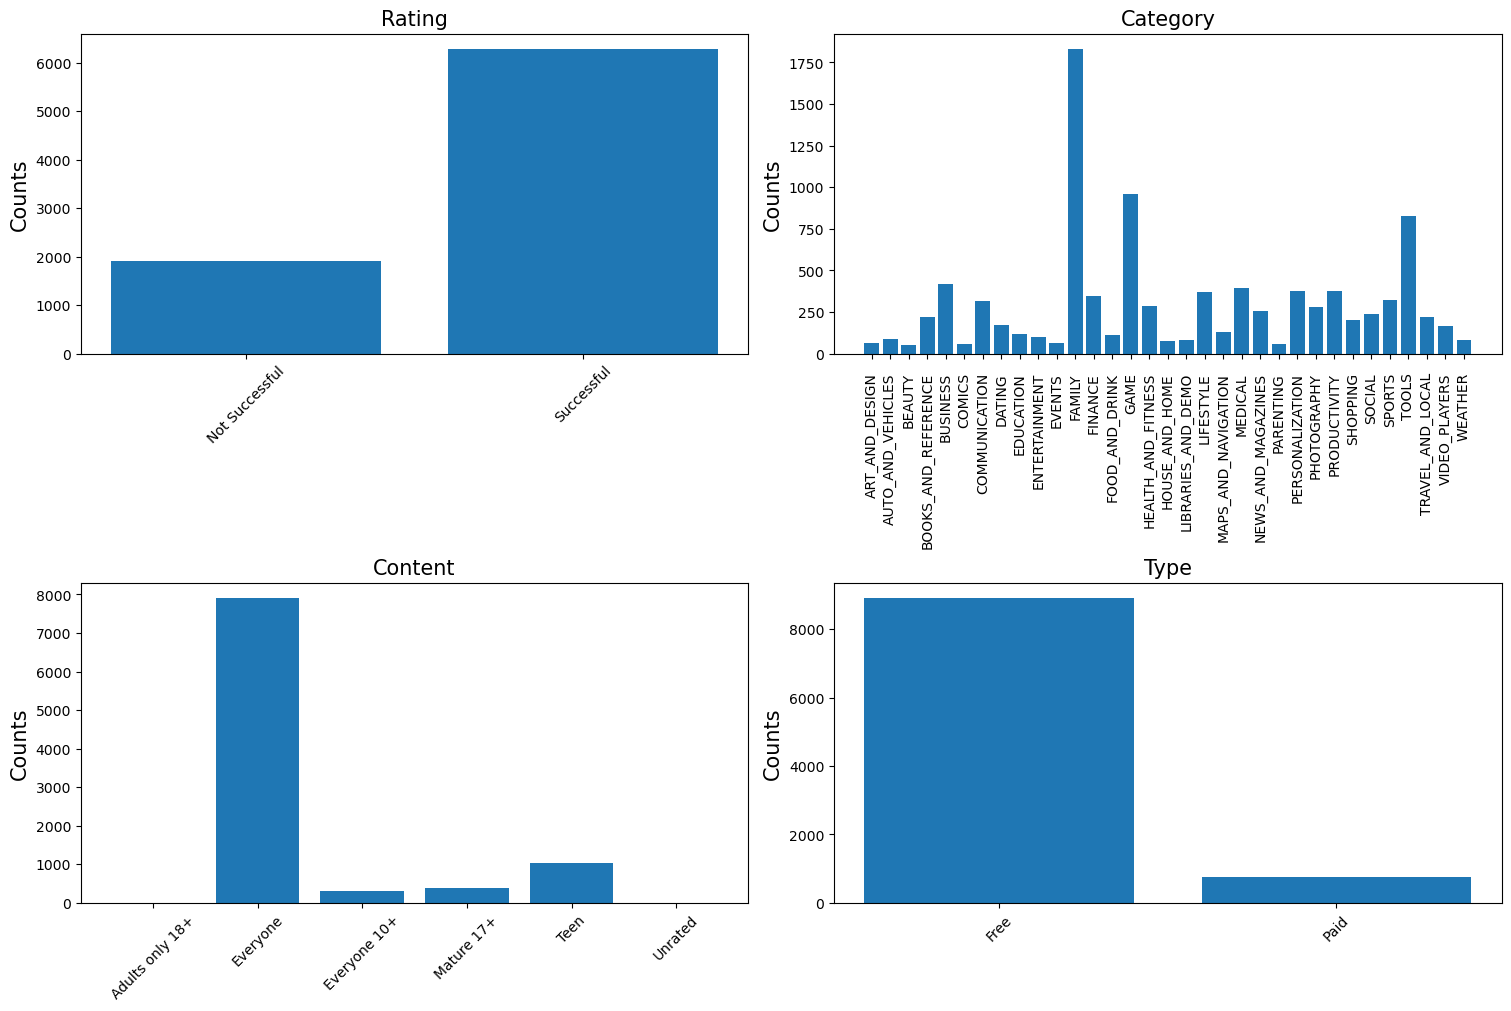

In [11]:
# Create bar charts 

# Set figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)
# Make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2, constrained_layout = True)
# Define data to visualize - Rating(Successful/Not Successful)
X_Successful = play_df_plots.groupby('rating').size().reset_index(name='Counts')['rating']
Y_Successful = play_df_plots.groupby('rating').size().reset_index(name='Counts')['Counts']
# Make plot
axes[0, 0].bar(X_Successful, Y_Successful)
axes[0, 0].set_title('Rating', fontsize=15)
axes[0, 0].set_ylabel('Counts', fontsize=15)
axes[0, 0].tick_params(axis='both', labelsize=10)
axes[0, 0].tick_params(axis='x', labelrotation = 45)

# Define data to visualize - Category
X_Category = play_df_plots.groupby('category').size().reset_index(name='Counts')['category']
Y_Category = play_df_plots.groupby('category').size().reset_index(name='Counts')['Counts']
# Make plot
axes[0, 1].bar(X_Category, Y_Category)
axes[0, 1].set_title('Category', fontsize=15)
axes[0, 1].set_ylabel('Counts', fontsize=15)
axes[0, 1].tick_params(axis='both', labelsize=10)
axes[0, 1].tick_params(axis='x', labelrotation = 90, pad=10)

# Define data to visualize - Content Rating
X_Content = play_df_plots.groupby('content_rating').size().reset_index(name='Counts')['content_rating']
Y_Content = play_df_plots.groupby('content_rating').size().reset_index(name='Counts')['Counts']
# Make plot
axes[1, 0].bar(X_Content, Y_Content)
axes[1, 0].set_title('Content', fontsize=15)
axes[1, 0].set_ylabel('Counts', fontsize=15)
axes[1, 0].tick_params(axis='both', labelsize=10)
axes[1, 0].tick_params(axis='x', labelrotation = 45)

# Define data to visualize - Type(Paid or Free)
X_Type = play_df_plots.groupby('type').size().reset_index(name='Counts')['type']
Y_Type = play_df_plots.groupby('type').size().reset_index(name='Counts')['Counts']

# Make plot
axes[1, 1].bar(X_Type, Y_Type)
axes[1, 1].set_title('Type', fontsize=15)
axes[1, 1].set_ylabel('Counts', fontsize=15)
axes[1, 1].tick_params(axis='both', labelsize=10)
axes[1, 1].tick_params(axis='x', labelrotation = 45)
plt.show()

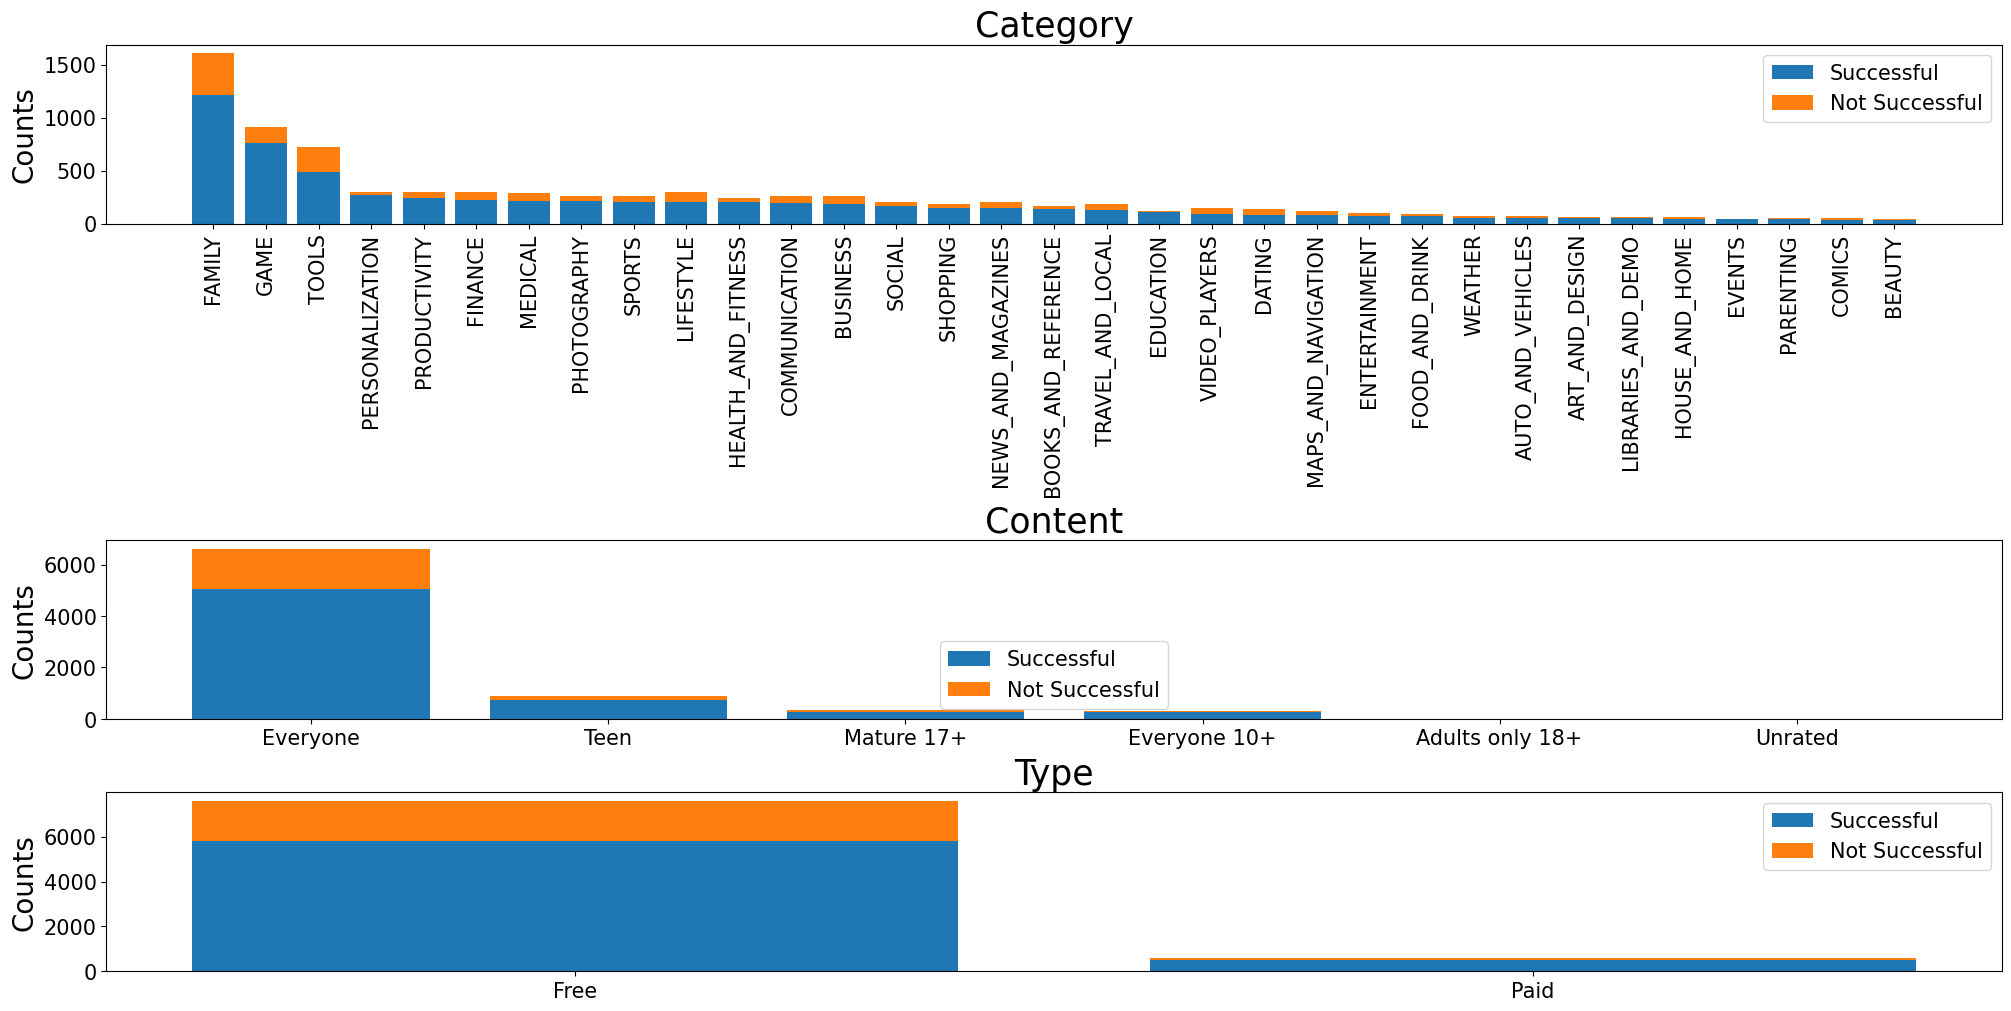

In [12]:
# Create stacked bar charts to compare success in relation to other features

#Set figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# Make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 1, constrained_layout = True)

# Define data to visualize - Category
Cat_success = play_df_plots[play_df_plots['rating']=='Successful']['category'].value_counts()
Cat_not_success = play_df_plots[play_df_plots['rating']=='Not Successful']['category'].value_counts()
Cat_not_success = Cat_not_success.reindex(index = Cat_success.index)
# Make stacked plot
p1 = axes[0].bar(Cat_success.index, Cat_success.values)
p2 = axes[0].bar(Cat_not_success.index, Cat_not_success.values, bottom=Cat_success.values)
axes[0].set_title('Category', fontsize=25)
axes[0].set_ylabel('Counts', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].tick_params(axis='x', labelrotation = 90)
axes[0].legend((p1[0], p2[0]), ('Successful', 'Not Successful'), fontsize = 15)

# Define data to visualize - Content
Con_success = play_df_plots[play_df_plots['rating']=='Successful']['content_rating'].value_counts()
Con_not_success = play_df_plots[play_df_plots['rating']=='Not Successful']['content_rating'].value_counts()
Con_not_success = Con_not_success.reindex(index = Con_success.index)
# Make stacked plot
p3 = axes[1].bar(Con_success.index, Con_success.values)
p4 = axes[1].bar(Con_not_success.index, Con_not_success.values, bottom=Con_success.values)
axes[1].set_title('Content', fontsize=25)
axes[1].set_ylabel('Counts', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].legend((p3[0], p4[0]), ('Successful', 'Not Successful'), fontsize = 15)


# Define data to visualize - Type
Type_success = play_df_plots[play_df_plots['rating']=='Successful']['type'].value_counts()
Type_not_success = play_df_plots[play_df_plots['rating']=='Not Successful']['type'].value_counts()
Type_not_success = Type_not_success.reindex(index = Type_success.index)
# Make stacked plot
p5 = axes[2].bar(Type_success.index, Type_success.values)
p6 = axes[2].bar(Type_not_success.index, Type_not_success.values, bottom=Type_success.values)
axes[2].set_title('Type', fontsize=25)
axes[2].set_ylabel('Counts', fontsize=20)
axes[2].tick_params(axis='both', labelsize=15)
axes[2].legend((p5[0], p6[0]), ('Successful', 'Not Successful'), fontsize = 15);

### Observations

- Most of the apps sampled are considered successful
- Apps rated suitable for everyone significantly outnumber those that have age restrictions
- Free apps significantly outnumber paid apps
- Category seems to have the most significant impact on success rate of an app
- Family, Game, and Tools are the top categories of succcessful games

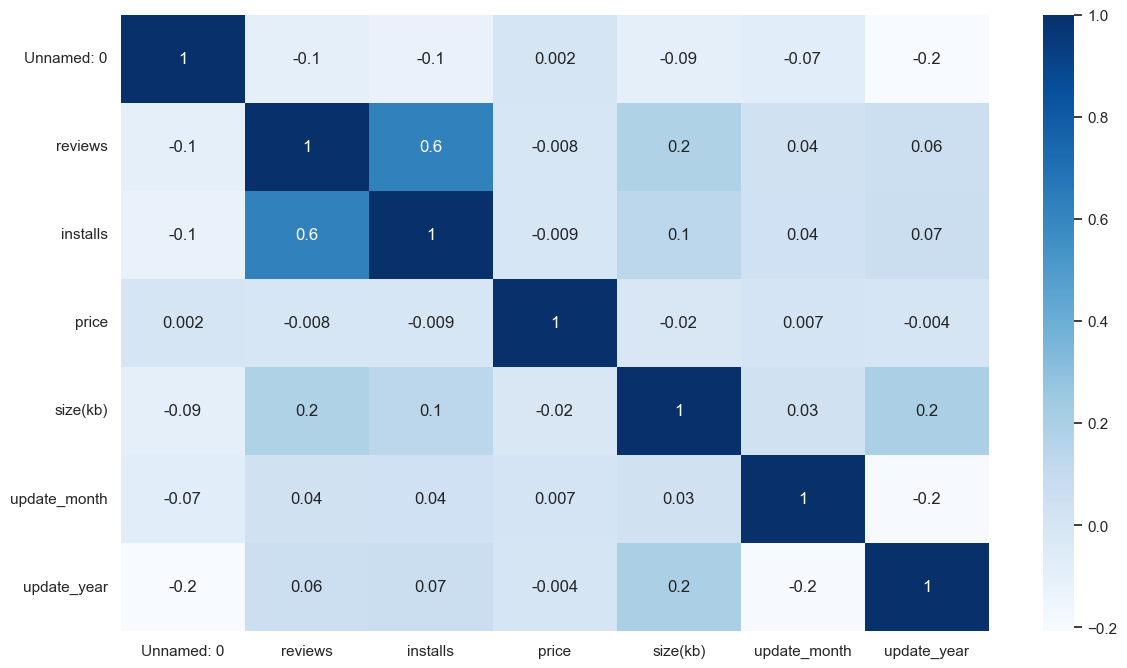

In [13]:
# Create heatmap
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = play_df_plots.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

### Observations

- Weak correlations are shown in the heat map as a whole when looking at the numerical features

### Insights

This is a particularly messy dataset which is not surprising given that there are numerous mobile apps in circulation and many of them are not well rated.
The weak correlations and skew of the data will require considerable work in order to create a meaningful model. Since there is a rather sizeable amount of data here, further treatment may be possible with just a subset of the data. Alternatively, it may be worthwhile to consider the threshold previously set for successful vs not successful apps.

## Data Preparation

When we conducted our initial exploration of our data, we had set the measure of success of an app as a rating of 4 (nearest integer rating to the mean value). In order to prepare the data for modeling, we will first drop columns which we do not believe will be necessary for analysis. Some of thes are common sense logic, such as the `Unnamed: 0` and `app` columns while others (`update_year`, `update_month`, `size(kb)`) showed minimal correlation to our `rating` column as seen in the heatmap. We will then need to make the adjustments noted in our exploration, which upon further examination, appears to have included incorrect code to replace the `review` column with categorical variables rather than the `rating` column.

In [14]:
# Create copy of original dataframe to prepare for model to preserve original dataframe
play_df = play_store_df.copy() 

In [15]:
# Drop unnecessary features from dataframe
play_df = play_df.drop(['Unnamed: 0','app','update_year','update_month','size(kb)'], axis=1)

In [16]:
#look for missing data
print(play_df.isna().sum())

category             0
rating            1462
reviews              0
installs             0
type                 0
price                0
content_rating       0
genres               0
current_ver       1062
android_ver        991
dtype: int64


We find that there are columns with a considerable amount of missing data included such as `current_ver` and `android_ver`. While it is certainly possible for us to fill in this missing data with the most frequently used value for these respective columns, this would not give us accurate data or prove useful in this instance. We will therefore proceed with dropping these columns as well. Then we must determine how we will address the missing values in the ratings column. To do so we will opt to fill in those values with the mean rating. Finally, presuming that the model developed is intended to provide useful predictabilty of success of non-released apps, we will want to drop the `installs` column as we wouldn't have these figures in an actual setting.

In [17]:
# Drop unnecessary features from dataframe
play_df = play_df.drop(['current_ver','android_ver','installs'], axis=1)

In [18]:
# Replace missing values in rating column with mean

play_df.fillna(play_df['rating'].mean(), inplace=True)

In [19]:
#look for missing data
print(play_df.isna().sum())

category          0
rating            0
reviews           0
type              0
price             0
content_rating    0
genres            0
dtype: int64


In [20]:
#View summary statistics to see impact to data
play_df.describe()

,rating,reviews,type,price
count,9658.000000,9.658000e+03,9658.000000,9658.000000
mean,4.173243,2.166150e+05,0.078277,1.099413
std,0.494338,1.831413e+06,0.268621,16.853021
min,1.000000,0.000000e+00,0.000000,0.000000
25%,4.000000,2.500000e+01,0.000000,0.000000
50%,4.200000,9.670000e+02,0.000000,0.000000
75%,4.500000,2.940800e+04,0.000000,0.000000
max,5.000000,7.815831e+07,1.000000,400.000000


As we can see, the mean and standard deviation of `rating` were only minimally impacted by filling in these missing values. Bearing this in mind, we should now consider transforming the `rating` and `type` columns from a numerical feature to a categorical feature. As previously noted, we are setting the rating threshold to $4$ (or the closest integer to the mean for this column). Values greater than or equal to $4$ are deemed 'Successful' while those less than $4$ will be considered 'Not Successful'. As noted in the documentation on Kaggle, for the `type` column, $1$ is a paid and $0$ is a free app.

In [21]:
# Transform numerical variables to categories
play_df.loc[play_df['rating'] < 4, 'rating'] = 0 # Ratings less than 4 are changed to 0
play_df.loc[play_df['rating'] >= 4, 'rating'] = 1 # Reviews greater or equal to 4 changed to 1
play_df = play_df.replace \
({'rating': {1: 'Successful', 0: 'Not Successful'}}) # Replaces numerical with categorical equivalent
play_df = play_df.replace \
({'type': {1: 'Paid', 0: 'Free'}}) # Replace numerical feature with categorical equivalent

In [22]:
# Verify dimensions of dataframe
play_df.shape

(9658, 7)

In [23]:
# Verify dtypes of remaining columns to ensure that type has been converted for rating and type columns
play_df.dtypes

category           object
rating             object
reviews             int64
type               object
price             float64
content_rating     object
genres             object
dtype: object

In [24]:
# Create variables for features based on if they are categorical or numerical
categorical = play_df.select_dtypes(include=['object']).columns.tolist()

# Drop 'rating' column from categorical list
categorical.remove('rating')

# Drop 'genres' column from categorical list as it has multiple values
categorical.remove('genres')

In [25]:
# Create dummy variables with categorical feature data
# Concatenate new and original datasets
for cat in categorical:
    dummy=pd.get_dummies(play_df[cat])
    play_df = pd.concat([play_df, dummy], axis=1)
    
# Drop categorical features
play_df=play_df.drop(categorical, axis=1)

In [26]:
# Remove whitespace from genres
play_df['genres'] = play_df['genres'].str.replace(" ", "")

In [27]:
# Create dummy variabels out of genres which are separated by genre
genre_dummy=play_df['genres'].str.get_dummies(sep=';')

In [28]:
# Concatenate new and original datasets
play_df = pd.concat([play_df, genre_dummy], axis=1)

# Drop genre column
play_df=play_df.drop('genres', axis=1)

In [29]:
# Display last 5 lines to show new dummy variables created
play_df.tail()

,rating,reviews,price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,...,Simulation,Social,Sports,Strategy,Tools,Travel&Local,Trivia,VideoPlayers&Editors,Weather,Word
9653,Successful,38,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9654,Successful,4,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9655,Successful,3,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9656,Successful,114,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9657,Successful,398307,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Create features and target variables
features, target = play_df.drop('rating', axis= 1), play_df['rating']

In [31]:
# Split into  training and test sets
features_train, features_test, target_train, target_test = \
train_test_split(features, target, random_state=0, test_size = 0.2)

In [32]:
# Display the sizes of the training and test feature sets
print(features_train.shape)
print(features_test.shape)

# Display number of successful/not successful games are in the training and test sets
print(target_train.value_counts())
print(target_test.value_counts())

(7726, 96)
(1932, 96)
Successful        6208
Not Successful    1518
Name: rating, dtype: int64
Successful        1540
Not Successful     392
Name: rating, dtype: int64


Since the column for `review`was particularly skewed as visualized in our initial set, we will create a new feature: `log_reviews` using `np.log1p` to give us slightly less skewed features to work with.

In [33]:
# Create columns for the log of reviews to reduce skew
features_train['log_reviews'] = np.log1p(features_train['reviews'])
features_test['log_reviews'] = np.log1p(features_test['reviews'])

In [34]:
# Drop the non-transformed columns from the original features lists

features_train = features_train.drop(['reviews'], axis=1)
features_test = features_test.drop(['reviews'], axis=1)

In [35]:
# Check dimensions of the training and test feature matrices
print(features_train.shape)
print(features_test.shape)

# Display the training features
features_train.head()

(7726, 96)
(1932, 96)


,price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,...,Social,Sports,Strategy,Tools,Travel&Local,Trivia,VideoPlayers&Editors,Weather,Word,log_reviews
5476,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.098612
9310,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1.098612
159,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.529943
460,0.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,10.597534
6673,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.000000


## Model Building and Evaluation

Before determining what sort of model to build, we must first go back to the problem we are trying to answer, which predicting whether an app will be successful given a certain set of features about the app. This is ultimately speaking a binary classification problem that we're trying to solve. As such, we shall proceed with considering some of the more commonly used algorithms for binary classification, such as: K-Nearest Neighbors, Random Forest, and Logistic Regression.

As a starting point we've chosen to scale with `MinMaxScaler()` and classify with `KNeighborsClassifier()` without considering any feature reduction or selection. Below we create a pipeline to fit the scaler and classifier to our training data. For our default, we choose $5$ as our `n_neighbors` value.

In [36]:
# Searching for best model using a variety of classifiers
# Import required libraries, create pipeline, 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler # For scaling features
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.decomposition import PCA # Feature reduction
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Create min-max scaler
minmax = MinMaxScaler()

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Create Pipeline
pipe = Pipeline([('preprocess', minmax), ('model', knn)])

default_knn=pipe.fit(features_train,target_train)

Then we use this fitted pipeline to make predictions on the test data and using `accuracy_score`, we determine how well the model compares to our already labeled test targets.

In [37]:
default_preds=default_knn.predict(features_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Accuracy Score : ", accuracy_score(target_test, default_preds))

Accuracy Score :  0.7665631469979296


Next we create the variable `search_space` so that we can pass a variable `n_neighbors` value to `GridSearchCV()` and find the best neighborhood size.

In [38]:
# Create  search space for KNN classifier where “n_neighbors” parameter varies from 1 to 10
search_space =[{'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}]

# Create grid search
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(features_train, target_train)

In [39]:
# Find best neighborhood size (k)

gridsearch.best_estimator_.get_params()['model__n_neighbors']

9

We use the best estimator determined by the grid search to test the accuracy of this new model where `n_neighbors` is $9$ and find the accuracy of our new model.

In [40]:
# Create predictions using best neighborhood size
optimal_preds=gridsearch.predict(features_test)

# Display accuracy

print("Accuracy Score : ", accuracy_score(target_test, optimal_preds))

Accuracy Score :  0.7805383022774327


Here, we update our pipeline to include option to test preprocessing with `StandardScaler()`, then add a selector step to process dimensionality reduction with `PCA()` before passing the on to compare `KNearestNeighbors()`, `LogisticRegression()` and `RandomForestClassifier()` models.

In [41]:
# Load libraries for additional learning algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Create Updated Pipeline with additional preprocess and selectors
pipe = Pipeline([('preprocess', StandardScaler()),('selector', PCA(n_components=0.90, whiten=True)), ('model', knn)])

# Update search space with additional preprocessing, feature selector, learning algorithms and hyperparameters

search_space = [{'model': [LogisticRegression()],
             'model__penalty': ['l1', 'l2'],
             'model__C': np.logspace(0,4,10)},
            {'model': [RandomForestClassifier()],
            'model__n_estimators': [10,100,1000],
            'model__max_features':[1,2,3]},
            {'model': [KNeighborsClassifier(n_jobs=-1)],
            'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
               {'model': [GradientBoostingClassifier()],
            'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}]

# Create new grid search
gridsearch=GridSearchCV(pipe, search_space, cv=5, verbose=0)

In [42]:
# Fit grid search
best_model = gridsearch.fit(features_train, target_train)

In [43]:
# View best model's hyperparameters
best_params = best_model.best_params_
print(best_params)

{'model': LogisticRegression(), 'model__C': 1.0, 'model__penalty': 'l2'}


In [44]:
# View best model's pipe
best_pipe = best_model.best_estimator_
print(best_pipe)

Pipeline(steps=[('preprocess', StandardScaler()),
                ('selector', PCA(n_components=0.9, whiten=True)),
                ('model', LogisticRegression())])


In [45]:
# Create predictions with best model
best_preds = best_model.predict(features_test)

In [46]:
# Display model accuracy
print("Accuracy Score : ", accuracy_score(target_test, best_preds))

Accuracy Score :  0.7971014492753623


Expanding on our prior model selections and analysis, we will now consider dimensionality reduction by feature selection or extraction, and other models. Below we update our pipeline to include option to test preprocessing with either `StandardScaler()` or `MinMaxScaler()`, then add a selector step to process dimensionality reduction by using `VarianceThreshold()` or `PCA()` before passing the on to compare `KNearestNeighbors()`, `LogisticRegression()` and `RandomForestClassifier()` models.

In [47]:
# Create Updated Pipeline with additional preprocess and selectors
pipe = Pipeline([('preprocess', minmax),('selector', VarianceThreshold()), ('model', knn)])

# Update search space with additional preprocessing, feature selector, learning algorithms and hyperparameters

search_space = [{'preprocess':[StandardScaler(), MinMaxScaler()]},
                {'selector': [VarianceThreshold()],
                 'selector__threshold': [0, 0.001, 0.01]},
                {'selector': [PCA(n_components=0.99, whiten=True)]},
                {'model': [LogisticRegression()],
             'model__penalty': ['l1', 'l2'],
             'model__C': np.logspace(0,4,10)},
            {'model': [RandomForestClassifier()],
            'model__n_estimators': [10,100,1000],
            'model__max_features':[1,2,3]},
            {'model': [KNeighborsClassifier(n_jobs=-1)],
            'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}]

# Create new grid search
gridsearch=GridSearchCV(pipe, search_space, cv=5, verbose=0)

Here we fit the best model found with `GridSearchCV()` to our training set then verify the parameters of the best model and the Pipeline steps to get to the best model.

In [48]:
# Fit grid search
best_model = gridsearch.fit(features_train, target_train)

In [49]:
# View best model's hyperparameters
best_params = best_model.best_params_
print(best_params)

{'model': LogisticRegression(), 'model__C': 1.0, 'model__penalty': 'l2'}


In [50]:
# View best model's pipe
best_pipe = best_model.best_estimator_
print(best_pipe)

Pipeline(steps=[('preprocess', MinMaxScaler()),
                ('selector', VarianceThreshold()),
                ('model', LogisticRegression())])


Finally, we create predictions with this model and check the accuracy of our model predictions.

In [51]:
# Create predictions with best model
best_preds = best_model.predict(features_test)

In [52]:
# Display model accuracy
print("Accuracy Score : ", accuracy_score(target_test, best_preds))

Accuracy Score :  0.7971014492753623


### Insights

The below table summarizes the accuracies of the previous model building and analysis: 

    
| Classifier      | Scaler | Dimensionality Reduction | Accuracy |
| ----------- | ----------- |----------- | ----------- |
| K-Nearest Neighbors(k=5) | MinMaxScaler |N/A |0.767 |
| K-Nearest Neighbors(k=9) | MinMaxScaler | N/A| 0.781 |
| Logistic Regression (C=1.0, penalty=l2) | StandardScaler | PCA | 0.797 |
| Logistic Regression (C=1.0, penalty=l2) | MinMaxScaler | VarianceThreshold | 0.797 |

While the logistic regression was determined to be the best model through five-fold cross-validation, it is fairly similar in accuracy to both K-Nearest Neighbors models and are reasonably good. It would be reasonable to state that any of these models would be suitable for prediction purposes. However, it would be worth verifying if we can increase this accuracy with other algorithms used for clasifcation purposes, such as SVM and Naive Bayes.